# Introduction

## 1. Data Exploration

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from pathlib import Path

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [20]:
# Load data
current_dir = Path('.').resolve()
data = pd.read_csv(current_dir/'Admission_Prediction.csv')

# Display basic info
print("Data Shape:", data.shape)
print("\nFirst 5 rows:")
display(data.head())
print("\nLast 5 rows:")
display(data.tail())
print("\nData Info:")
display(data.info())
print("\nDescriptive Statistics:")
display(data.describe())

Data Shape: (500, 9)

First 5 rows:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65



Last 5 rows:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


None


Descriptive Statistics:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Observations from Data Exploration:
- Dataset has 400 entries with 9 columns
- No missing values (all columns have 400 non-null entries)
- Columns include: Serial No. (identifier), GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, and Chance of Admit (target)
- All numerical data except possibly 'Research' which is binary (0/1)
- Ranges appear reasonable for each feature (GRE 290-340, TOEFL 92-120, etc.)
- Target variable ('Chance of Admit') ranges from 0.34 to 0.97

## 2. Data Visualization

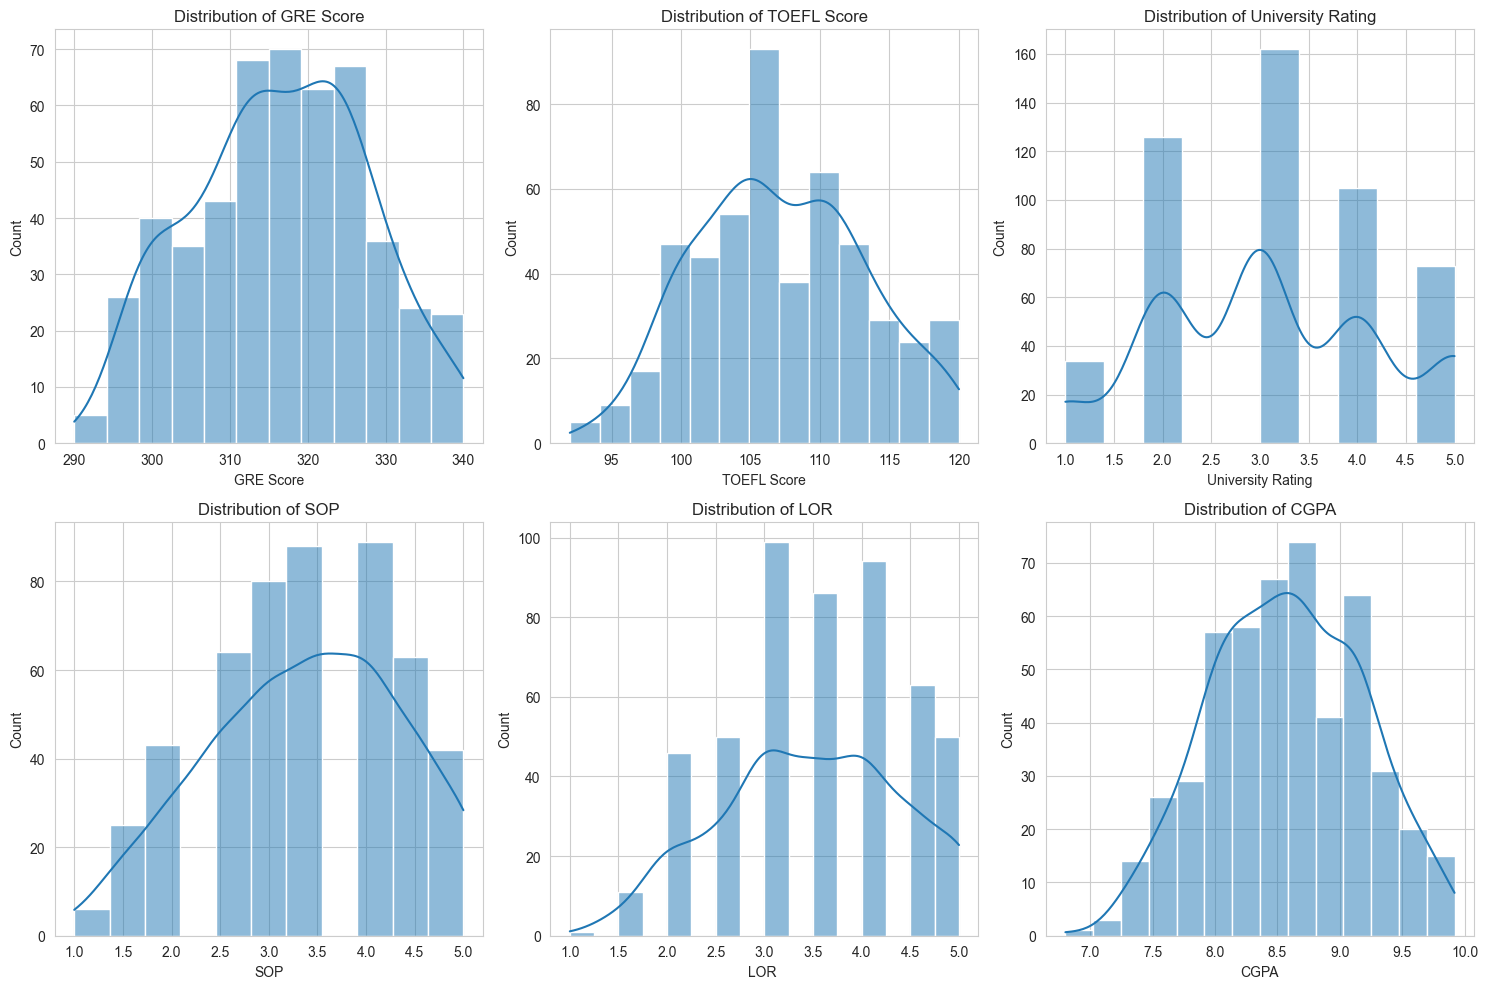

In [24]:
# Distribution of numerical features
numerical_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

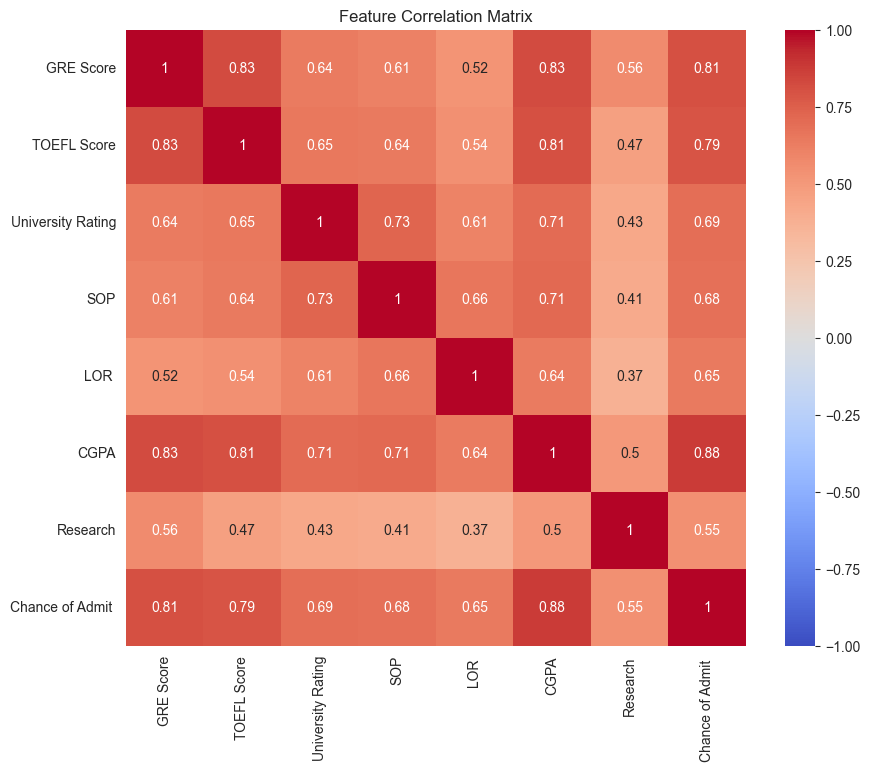

In [25]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr = data.drop('Serial No.', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

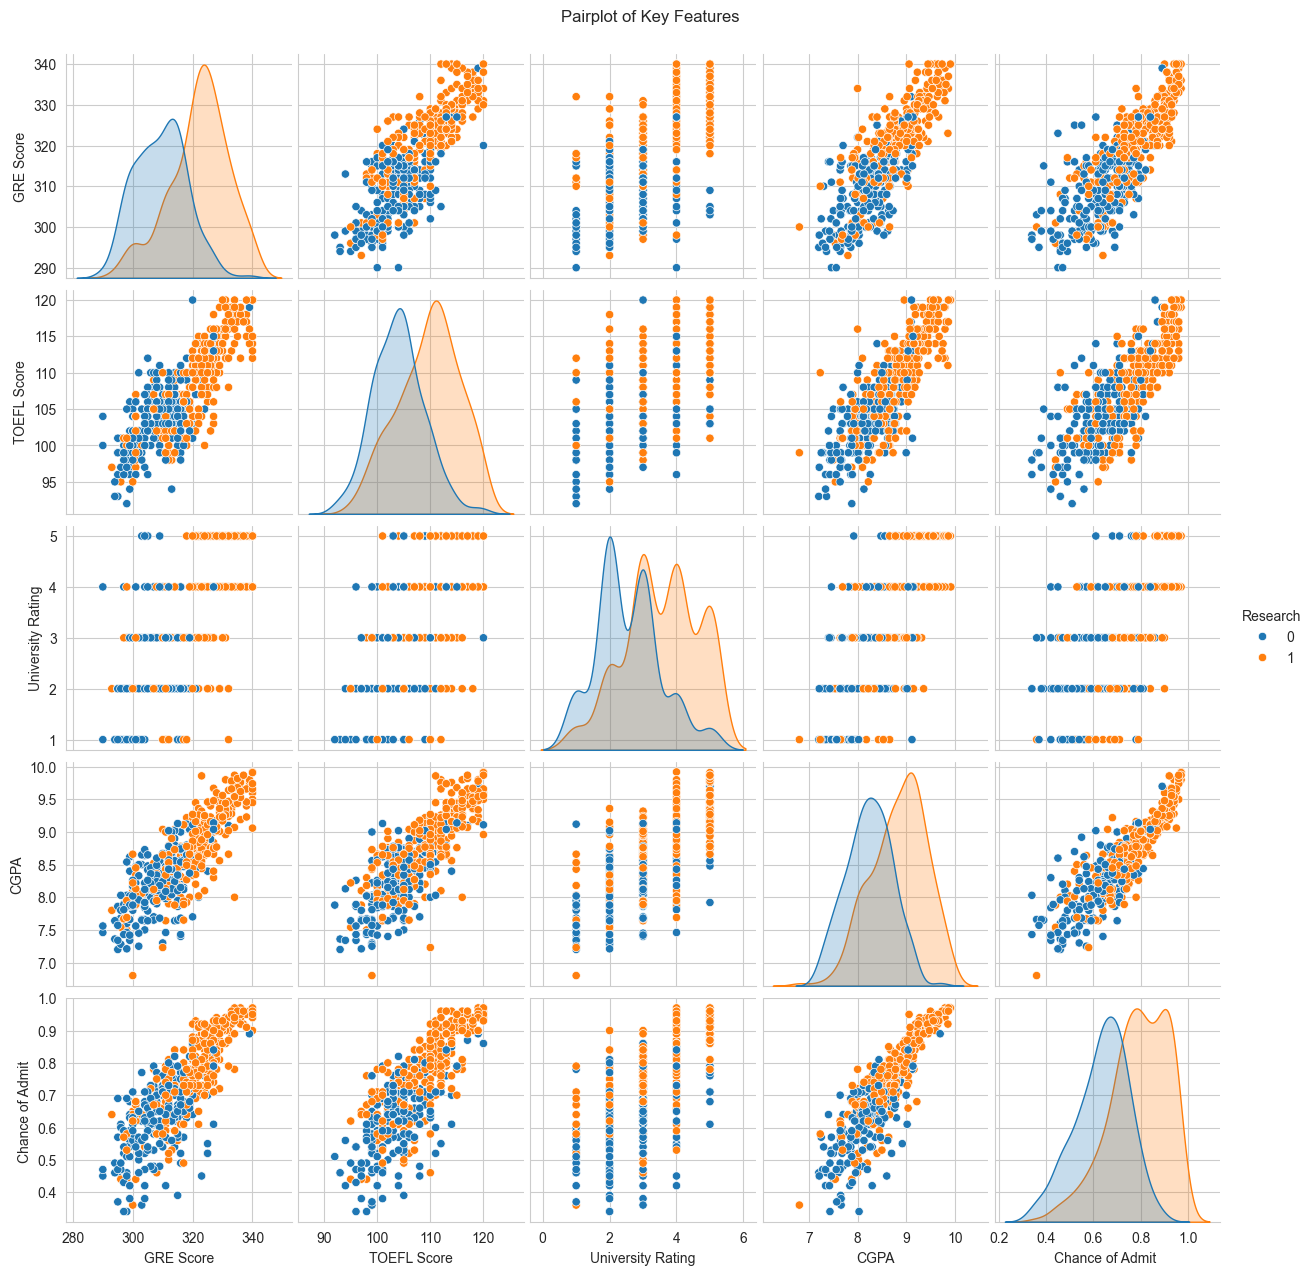

In [28]:

# print(data.columns.tolist())  # Verify exact column names

# Pairplot of selected features
sns.pairplot(data[['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA', 'Research', 'Chance of Admit ']], 
             hue='Research', diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

### Visualization Insights:
- GRE, TOEFL, and CGPA show strong positive correlation with admission chance
- Research experience (binary) shows noticeable impact on admission chances
- University Rating, SOP, and LOR show moderate correlation
- Most features are roughly normally distributed
- No extreme outliers visible in the distributions

## 3. Feature Engineering

In [29]:
# Drop Serial No. as it's just an identifier
data_clean = data.drop('Serial No.', axis=1)

# Check for missing values
print("Missing values per column:")
print(data_clean.isnull().sum())

# Verify all data is numeric
print("\nData types:")
print(data_clean.dtypes)

# All data is already numeric - no conversion needed

Missing values per column:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Data types:
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


## 4. Data Preprocessing

In [34]:


# Split data into features and target
X = data_clean.drop('Chance of Admit ', axis=1)
y = data_clean['Chance of Admit ']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (400, 7)
Test set shape: (100, 7)


## 5. Model Building - Linear Regression with Gradient Descent

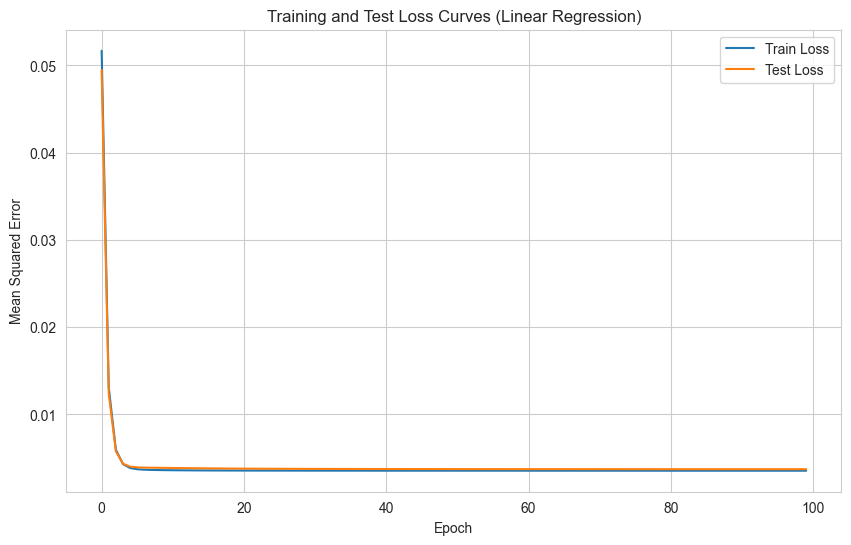

In [35]:

sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', alpha=0.01, random_state=42)

# Store loss values
train_loss = []
test_loss = []

# Partial fit for tracking loss
for epoch in range(100):
    sgd.partial_fit(X_train_scaled, y_train)
    
    # Calculate MSE for train and test
    train_pred = sgd.predict(X_train_scaled)
    test_pred = sgd.predict(X_test_scaled)
    
    train_loss.append(mean_squared_error(y_train, train_pred))
    test_loss.append(mean_squared_error(y_test, test_pred))

# Plot loss curves
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Loss Curves (Linear Regression)')
plt.legend()
plt.show()

Linear Regression (SGD) Performance:
R² Score: 0.8185
RMSE: 0.0609


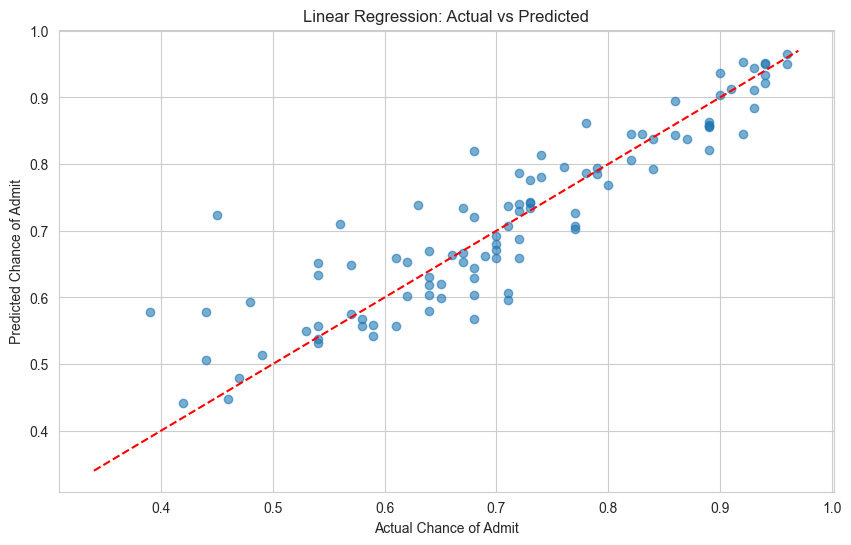

In [36]:
# Final evaluation
y_pred_sgd = sgd.predict(X_test_scaled)

print("Linear Regression (SGD) Performance:")
print(f"R² Score: {r2_score(y_test, y_pred_sgd):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_sgd)):.4f}")

# Plot predictions vs actual
plt.scatter(y_test, y_pred_sgd, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

## 6. Model Comparison

In [37]:
# Decision Tree
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Compare performance
models = {
    'Linear Regression (SGD)': y_pred_sgd,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
}

results = []
for name, pred in models.items():
    results.append({
        'Model': name,
        'R² Score': r2_score(y_test, pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, pred))
    })

results_df = pd.DataFrame(results)
display(results_df.sort_values('R² Score', ascending=False))

,Model,R² Score,RMSE
0,Linear Regression (SGD),0.818536,0.060918
2,Random Forest,0.797354,0.064375
1,Decision Tree,0.682846,0.080534


## 7. Save Best Model

In [38]:
# Save Random Forest as it performed best
model_path = current_dir.parent / "backend" / "models" / "university_admission_predictor.pkl"
model_path.parent.mkdir(parents=True, exist_ok=True)

joblib.dump({
    'model': rf,
    'scaler': scaler,
    'feature_names': X.columns.tolist()
}, model_path)

print(f"Best model (Random Forest) saved to {model_path}")

Best model (Random Forest) saved to /Users/Zhuanz/Am-I-getting-into-uni/backend/models/university_admission_predictor.pkl


## 8. Feature Importance Analysis

/var/folders/vh/mwklg8fd06gbrn3tjbj2nnkm0000gp/T/ipykernel_12695/2408210471.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


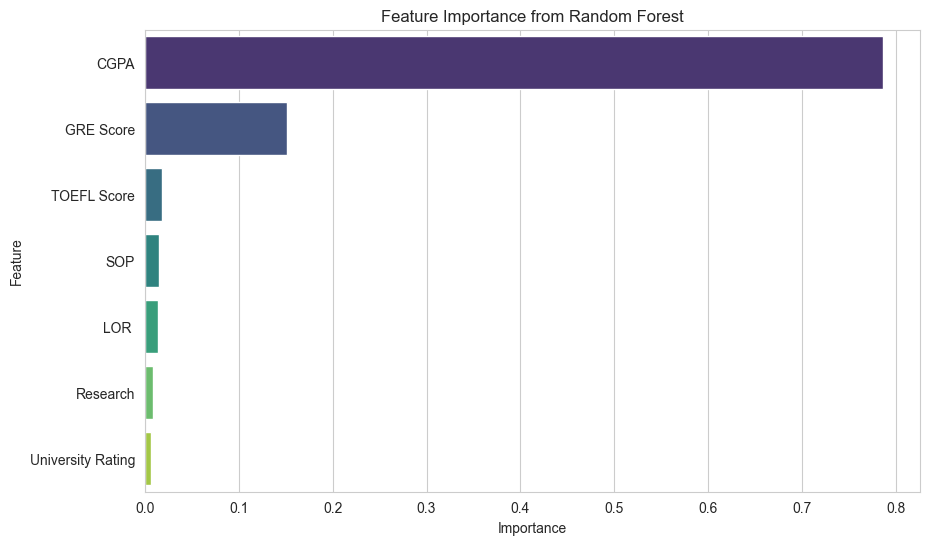

In [39]:
# Get feature importances from Random Forest
importances = rf.feature_importances_
features = X.columns

# Create DataFrame and sort
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.show()

### Final Observations:
- Linear regression performed best with R² of 0.82 and RMSE of 0.06
- CGPA is the most important feature, followed by GRE and TOEFL scores
- Research experience has moderate importance
- University Rating, SOP, and LOR have smaller but still meaningful impacts
- The model can effectively predict admission chances based on academic profile